<a href="https://colab.research.google.com/github/msabi/Crazy-Eights/blob/master/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import tensorflow as tf 
import torch 
import matplotlib.pyplot as plt 
import theano 
from sklearn import datasets 
from sklearn import metrics 
from sklearn.tree import DecisionTreeClassifier 


In [0]:
train = pd.read_csv('Train.csv')

In [0]:

test = pd.read_csv('Test.csv')

In [0]:
train.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [0]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [0]:
train_original=train.copy() 
test_original=test.copy()

In [0]:
train.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [0]:
test.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
dtype: object

In [0]:
train.shape

(8523, 12)

In [0]:
test.shape

(5681, 11)

In [0]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [0]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


AttributeError: ignored

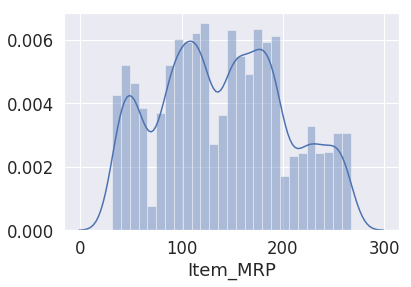

In [0]:
sns.distplot(train['Item_MRP']); 
train['Item_MRP'].plot.graph(figsize=(16,5)) 
plt.show()

In [0]:
train['Item_Weight'].fillna(train['Item_Weight'].mode()[0], inplace=True) 
#train['Outlet_Size '].fillna(train['Outlet_Size '].mode()[0], inplace=True) 

In [0]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

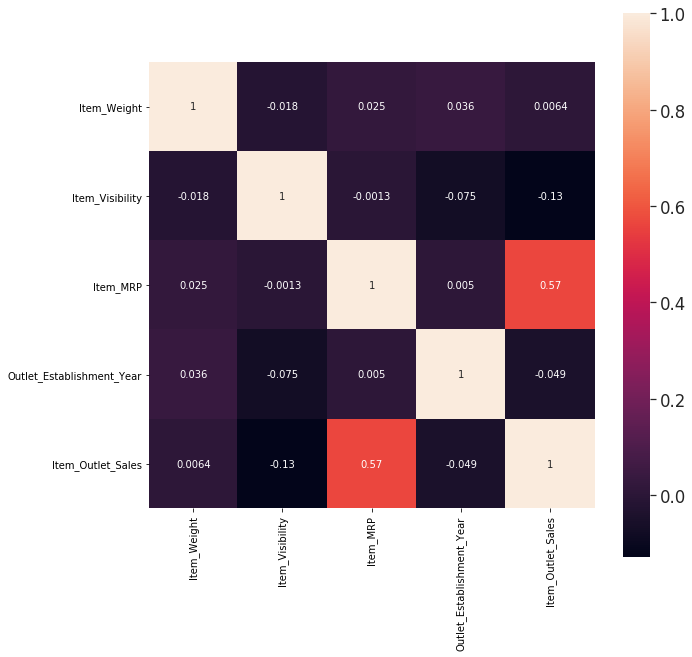

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt
fig = plt.subplots(figsize = (10,10))
sns.set(font_scale=1.5)
sns.heatmap(train.corr(),square = True,cbar=True,annot=True,annot_kws={'size': 10})
plt.show()

In [0]:
pd.set_option('display.width', 200)
pd.set_option('precision', 3)
correlations = train.corr(method='pearson')
print(correlations)

                           Item_Weight  ...  Item_Outlet_Sales
Item_Weight                      1.000  ...              0.006
Item_Visibility                 -0.018  ...             -0.129
Item_MRP                         0.025  ...              0.568
Outlet_Establishment_Year        0.036  ...             -0.049
Item_Outlet_Sales                0.006  ...              1.000

[5 rows x 5 columns]


In [0]:
skew = train.skew()
print(skew)

Item_Weight                  0.175
Item_Visibility              1.167
Item_MRP                     0.127
Outlet_Establishment_Year   -0.397
Item_Outlet_Sales            1.178
dtype: float64


In [0]:
skew = train.skew()
print(skew)

Item_Weight                  0.175
Item_Visibility              1.167
Item_MRP                     0.127
Outlet_Establishment_Year   -0.397
Item_Outlet_Sales            1.178
dtype: float64


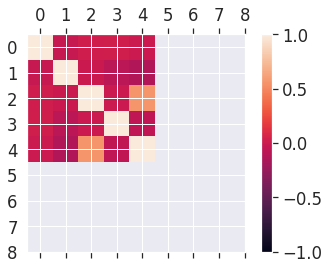

In [0]:
correlations = train.corr()
# plot correlation matrix
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,9,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
#ax.set_xticklabels(names)
#ax.set_yticklabels(names)
plt.show()

In [0]:
def MSE(y, y_hat):
  num_ex = len(y)
  mse_loss = np.sum((y - y_hat)**2)/num_ex
  return mse_loss

In [0]:

X = train['Item_MRP'].values
Y = train['Item_Outlet_Sales'].values

x_mean = np.mean(X)
y_mean = np.mean(Y)
#total number of values
n = len(X)
# using the formula to calculate the b1 and b0
numerator = 0
denominator = 0
for i in range(n):
    numerator += (X[i] - x_mean) * (Y[i] - y_mean)
    denominator += (X[i] - x_mean) ** 2
    
b1 = numerator / denominator
b0 = y_mean - (b1 * x_mean)
#printing the coefficient
print(b1, b0)

15.553023535202088 -11.575142825167404


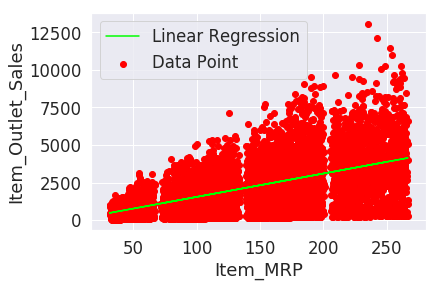

In [0]:

y = b0 + b1 * X
#plotting line 
plt.plot(X, y, color='#00ff00', label='Linear Regression')
#plot the data point
plt.scatter(X, Y, color='#ff0000', label='Data Point')
# x-axis label
plt.xlabel('Item_MRP')
#y-axis label
plt.ylabel('Item_Outlet_Sales')
plt.legend()
plt.show()

In [0]:
rmse = 0
for i in range(n):
    y_pred=  b0 + b1* X[i]
    rmse += (Y[i] - y_pred) ** 2
    
rmse = np.sqrt(rmse/n)
print(rmse)

1706.3640778522013


Skew of Univariate Distributions
Skew refers to a distribution that is assumed Gaussian (normal or bell curve) that is shifted or
squashed in one direction or another. Many machine learning algorithms assume a Gaussian
distribution. Knowing that an attribute has a skew may allow you to perform data preparation
to correct the skew and later improve the accuracy of your models. You can calculate the skew
of each attribute using the skew() function on the Pandas DataFrame.

In [0]:
#from pandas import read_csv
#filename = "pima-indians-diabetes.data.csv"
#names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
#data = read_csv(filename, names=names)
skew = train.skew()
print(skew)

Item_Weight                  0.082
Item_Visibility              1.167
Item_MRP                     0.127
Outlet_Establishment_Year   -0.397
Item_Outlet_Sales            1.178
dtype: float64


Density Plots
Density plots are another way of getting a quick idea of the distribution of each attribute. The
plots look like an abstracted histogram with a smooth curve drawn through the top of each bin,
much like your eye tried to do with the histograms.

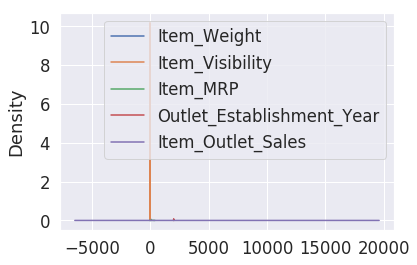

In [0]:
from matplotlib import pyplot
from pandas import read_csv
#filename = 'pima-indians-diabetes.data.csv'
#names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
#data = read_csv(filename, names=names)
train.plot(kind='density',   sharex=False)
pyplot.show()

Correlation Matrix Plot
Correlation gives an indication of how related the changes are between two variables. If two
variables change in the same direction they are positively correlated. If they change in opposite
directions together (one goes up, one goes down), then they are negatively correlated. You can
calculate the correlation between each pair of attributes. This is called a correlation matrix. You
can then plot the correlation matrix and get an idea of which variables have a high correlation
6.2. Multivariate Plots 42
with each other. This is useful to know, because some machine learning algorithms like linear
and logistic regression can have poor performance if there are highly correlated input variables
in your data.

In [0]:
# Correction Matrix Plot
from matplotlib import pyplot
from pandas import read_csv
import numpy
filename = 'pima-indians-diabetes.data.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = read_csv(filename, names=names)
correlations = data.corr()
# plot correlation matrix
fig = pyplot.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = numpy.arange(0,9,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
pyplot.show()

Scatter Plot Matrix
A scatter plot shows the relationship between two variables as dots in two dimensions, one
axis for each attribute. You can create a scatter plot for each pair of attributes in your data.
Drawing all these scatter plots together is called a scatter plot matrix. Scatter plots are useful
for spotting structured relationships between variables, like whether you could summarize the
relationship between two variables with a line. Attributes with structured relationships may
also be correlated and good candidates for removal from your dataset.

In [0]:
# Scatterplot Matrix
from matplotlib import pyplot
import pandas as pd
from pandas import read_csv
#from pandas.tools.plotting import scatter_matrix
#filename = "pima-indians-diabetes.data.csv"
#names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
#data = read_csv(filename, names=names)
scatter_matrix(train)
pyplot.show()

NameError: ignored

Rescale Data
When your data is comprised of attributes with varying scales, many machine learning algorithms
can benet from rescaling the attributes to all have the same scale. Often this is referred to
as normalization and attributes are often rescaled into the range between 0 and 1. This is
useful for optimization algorithms used in the core of machine learning algorithms like gradient
descent. It is also useful for algorithms that weight inputs like regression and neural networks
and algorithms that use distance measures like k-Nearest Neighbors. You can rescale your data
using scikit-learn using the MinMaxScaler class2.

In [0]:
# Rescale data (between 0 and 1)
from pandas import read_csv
from numpy import set_printoptions
from sklearn.preprocessing import MinMaxScaler
filename = 'pima-indians-diabetes.data.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(filename, names=names)
array = dataframe.values
# separate array into input and output components
X = array[:,0:8]
Y = array[:,8]
scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX = scaler.fit_transform(X)
# summarize transformed data
set_printoptions(precision=3)

Standardize Data
Standardization is a useful technique to transform attributes with a Gaussian distribution and
diering means and standard deviations to a standard Gaussian distribution with a mean of
0 and a standard deviation of 1. It is most suitable for techniques that assume a Gaussian
distribution in the input variables and work better with rescaled data, such as linear regression,
logistic regression and linear discriminate analysis. You can standardize data using scikit-learn
with the StandardScaler class3.

In [0]:
# Standardize data (0 mean, 1 stdev)
from sklearn.preprocessing import StandardScaler
from pandas import read_csv
from numpy import set_printoptions
filename = 'pima-indians-diabetes.data.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(filename, names=names)
array = dataframe.values
# separate array into input and output components
X = array[:,0:8]
Y = array[:,8]
scaler = StandardScaler().fit(X)
rescaledX = scaler.transform(X)
# summarize transformed data
set_printoptions(precision=3)
print(rescaledX[0:5,:])

Normalize Data
Normalizing in scikit-learn refers to rescaling each observation (row) to have a length of 1 (called
a unit norm or a vector with the length of 1 in linear algebra). This pre-processing method
can be useful for sparse datasets (lots of zeros) with attributes of varying scales when using
algorithms that weight input values such as neural networks and algorithms that use distance
measures such as k-Nearest Neighbors. You can normalize data in Python with scikit-learn
using the Normalizer class4.

In [0]:
# Normalize data (length of 1)
from sklearn.preprocessing import Normalizer
from pandas import read_csv
from numpy import set_printoptions
filename = 'pima-indians-diabetes.data.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(filename, names=names)
array = dataframe.values
# separate array into input and output components
X = array[:,0:8]
Y = array[:,8]
scaler = Normalizer().fit(X)
normalizedX = scaler.transform(X)
# summarize transformed data
set_printoptions(precision=3)
print(normalizedX[0:5,:])

Univariate Selection
Statistical tests can be used to select those features that have the strongest relationship with
the output variable. The scikit-learn library provides the SelectKBest class2 that can be used
with a suite of dierent statistical tests to select a specic number of features. The example
below uses the chi-squared (chi2) statistical test for non-negative features to select 4 of the best
features from the Pima Indians onset of diabetes dataset.

In [0]:
Feature Extraction with Univariate Statistical Tests (Chi-squared for classification)
from pandas import read_csv
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
# load data
filename = 'pima-indians-diabetes.data.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(filename, names=names)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]
# feature extraction
test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(X, Y)
# summarize scores
set_printoptions(precision=3)
print(fit.scores_)
features = fit.transform(X)
# summarize selected features
print(features[0:5,:])

Principal Component Analysis
Principal Component Analysis (or PCA) uses linear algebra to transform the dataset into a
compressed form. Generally this is called a data reduction technique. A property of PCA is that
you can choose the number of dimensions or principal components in the transformed result. In
the example below, we use PCA and select 3 principal components. Learn more about the PCA
class in scikit-learn by reviewing the API4.

In [0]:
from pandas import read_csv
from sklearn.decomposition import PCA
# load data
filename = 'pima-indians-diabetes.data.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(filename, names=names)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]
# feature extraction
pca = PCA(n_components=3)
fit = pca.fit(X)
# summarize components
print("Explained Variance: %s") % fit.explained_variance_ratio_
print(fit.components_)

Classication Report
The scikit-learn library provides a convenience report when working on classication prob-
lems to give you a quick idea of the accuracy of a model using a number of measures. The
classification report() function displays the precision, recall, F1-score and support for each
class. The example below demonstrates the report on the binary classication problem.

In [0]:
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
filename = 'pima-indians-diabetes.data.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(filename, names=names)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]
test_size = 0.33
seed = 7
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size,
random_state=seed)
model = LogisticRegression()
model.fit(X_train, Y_train)
predicted = model.predict(X_test)
report = classification_report(Y_test, predicted)
print(report)

Finalize Your Model with pickle
Pickle is the standard way of serializing objects in Python. You can use the pickle1 operation
to serialize your machine learning algorithms and save the serialized format to a le. Later you
can load this le to deserialize your model and use it to make new predictions. The example
below demonstrates how you can train a logistic regression model on the Pima Indians onset of
diabetes dataset, save the model to le and load it to make predictions on the unseen test set.

In [0]:
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from pickle import dump
from pickle import load
filename = 'pima-indians-diabetes.data.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(filename, names=names)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=7)
# Fit the model on 33%
model = LogisticRegression()
model.fit(X_train, Y_train)
# save the model to disk
filename = 'finalized_model.sav'
dump(model, open(filename, 'wb'))
# some time later...
# load the model from disk
loaded_model = load(open(filename, 'rb'))
result = loaded_model.score(X_test, Y_test)
print(result)

In [0]:
# Python Project Template
# 1. Prepare Problem
# a) Load libraries
# b) Load dataset
# 2. Summarize Data
# a) Descriptive statistics
# b) Data visualizations
# 3. Prepare Data
# a) Data Cleaning
# b) Feature Selection
# c) Data Transforms
# 4. Evaluate Algorithms
# a) Split-out validation dataset
# b) Test options and evaluation metric
# c) Spot Check Algorithms
# d) Compare Algorithms
# 5. Improve Accuracy
# a) Algorithm Tuning
# b) Ensembles
# 6. Finalize Model
# a) Predictions on validation dataset
# b) Create standalone model on entire training dataset
# c) Save model for later use